In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/knn.csv")
df

,Weight(x2)kg,Height(y2)cm,Class
0,51kg,167cm,Underweight
1,66kg,177cm,Normal
2,75kg,169cm,Overweight
3,69kg,176cm,Normal
4,50kg,173cm,Underweight
5,82kg,170cm,Overweight
6,65kg,172cm,Normal
7,58kg,180cm,Underweight
8,68kg,162cm,Overweight
9,63kg,165cm,Normal


In [ ]:
df['Weight(x2)kg']=df["Weight(x2)kg"].apply(lambda a:a.replace("kg","")).astype(int)
df['Height(y2)cm']=df["Height(y2)cm"].apply(lambda a:a.replace("cm","")).astype(int)
df

,Weight(x2)kg,Height(y2)cm,Class
0,51,167,Underweight
1,66,177,Normal
2,75,169,Overweight
3,69,176,Normal
4,50,173,Underweight
5,82,170,Overweight
6,65,172,Normal
7,58,180,Underweight
8,68,162,Overweight
9,63,165,Normal


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Weight(x2)kg,0
Height(y2)cm,0
Class,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     int64 
 1   Height(y2)cm  25 non-null     int64 
 2   Class         25 non-null     object
dtypes: int64(2), object(1)
memory usage: 732.0+ bytes


In [ ]:
x=df.iloc[:,[0,1]].values
y=df.iloc[:,2].values

In [ ]:
x

array([[ 51, 167],
       [ 66, 177],
       [ 75, 169],
       [ 69, 176],
       [ 50, 173],
       [ 82, 170],
       [ 65, 172],
       [ 58, 180],
       [ 68, 162],
       [ 63, 165],
       [ 52, 174],
       [ 58, 169],
       [ 78, 162],
       [ 65, 168],
       [ 62, 183],
       [ 72, 180],
       [ 80, 180],
       [ 60, 178],
       [ 57, 173],
       [ 73, 164],
       [ 53, 170],
       [ 74, 182],
       [ 72, 175],
       [ 53, 163],
       [ 55, 180]])

In [ ]:
y

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight'],
      dtype=object)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k=5
model=KNeighborsClassifier(n_neighbors=k,metric='euclidean')


In [ ]:
model.fit(x,y)

KNeighborsClassifier(metric='euclidean')

In [ ]:
model.predict([[57.7,154]])

array(['Normal'], dtype=object)

In [ ]:
y_pred=model.predict(x)
y_pred

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Underweight', 'Overweight',
       'Underweight', 'Normal', 'Normal', 'Normal', 'Underweight'],
      dtype=object)

In [ ]:
y

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y,y_pred)

0.92

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
av=confusion_matrix(y,y_pred)

In [ ]:

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

      Normal       0.90      0.90      0.90        10
  Overweight       1.00      0.86      0.92         7
 Underweight       0.89      1.00      0.94         8

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



0.9184

In [ ]:
ab=pd.DataFrame(av,index=("normal_a","overweight_a","underweight_a"),columns=("normal_p","overweight_p","underweight_p") )
ab

,normal_p,overweight_p,underweight_p
normal_a,9,0,1
overweight_a,1,6,0
underweight_a,0,0,8


In [ ]:
print(9/10)
print(6/6)
print(8/9)

0.9
1.0
0.8888888888888888


In [ ]:
print(9/10)
print(6/7)
print(8/8)

0.9
0.8571428571428571
1.0


In [ ]:
print(2*0.9*0.9/1.8)
print(2*1*0.86/1.86)
print(2*0.89*1/1.89)

0.9
0.9247311827956989
0.9417989417989419


In [ ]:
df1=df[df['Class']=='Normal']
df2=df[df['Class']=='Overweight']
df3=df[df['Class']=='Underweight']
df3

,Weight(x2)kg,Height(y2)cm,Class
0,51,167,Underweight
4,50,173,Underweight
7,58,180,Underweight
10,52,174,Underweight
14,62,183,Underweight
17,60,178,Underweight
20,53,170,Underweight
24,55,180,Underweight


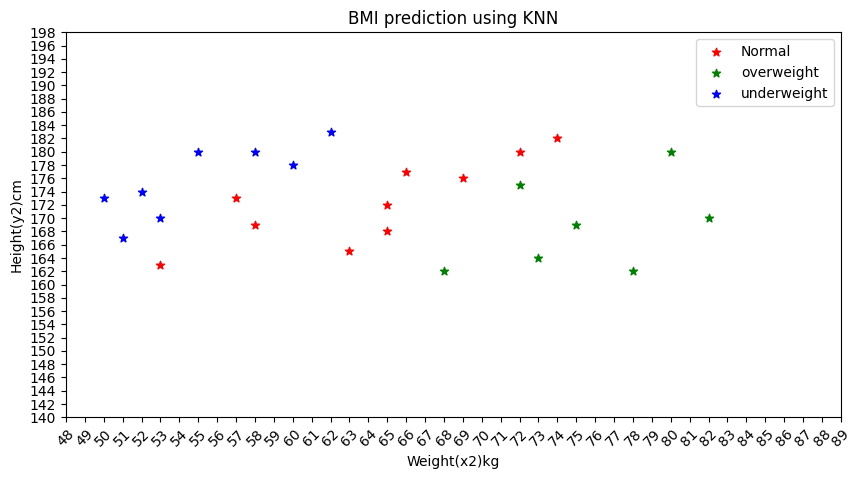

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df1['Weight(x2)kg'],df1['Height(y2)cm'],marker="*",color='red',label='Normal')
plt.scatter(df2['Weight(x2)kg'],df2['Height(y2)cm'],marker="*",color='green',label='overweight')
plt.scatter(df3['Weight(x2)kg'],df3['Height(y2)cm'],marker="*",color='blue',label='underweight')
plt.xticks(np.arange(48,90,1),rotation=45)
plt.yticks(np.arange(140,200,2))
plt.xlabel('Weight(x2)kg')
plt.ylabel('Height(y2)cm')
plt.title('BMI prediction using KNN')
plt.legend()
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'KNN_model')

['KNN_model']

In [ ]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
import streamlit as st

In [ ]:
%%writefile app.py
import streamlit as st
model=joblib.load('KNN_model')
st.title('BMI prediction model using height and weight')
st.subheader("model uses KNN classifier algorithm to predict BMI")
weight=st.number_input("enter weight",min_value=40,max_value=100,value=50,step=1)
height=st.numberinput("enter height",min_value=140,max_value=190,value=165,step=1)
if st.button("Get BMI"):
  BMI=model.predict([[weight,height]])
  st.header(f"your weight is {weight} and height is {height} therefore your BMI is: {BMI}")



Overwriting app.py


In [ ]:
! streamlit run app.py & npx localtunnel --port 5801



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.90.209.241:8501

⠼⠴your url is: https://solid-zebras-knock.loca.lt
  Stopping...
^C
